<a href="https://colab.research.google.com/github/kipsangmarion/Fibonacci-sequence-analyzer/blob/main/fibonacci_sequence_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fibonacci Sequence Analyzer

## Introduction
The Fibonacci Sequence is a series of numbers where each number is the sum of two preceding ones.
Fibonacci numbers may be defined by the recurrence relation:

$F_o = 0, F_1 = 1$ and $F_n = F_{n-1} + F_{n-2}$ for $n > 1$

Older definitions may omit $F_o = 0$ and have the definition as:

$F_1 = F_2 = 1$ and $F_n = F_{n-1} + F_{n-2}$ for $n >2$

## 1.Fibonacci Sequence Generator

The function below generates the Fibonacci sequence up to a specified number of terms or up to a given limit.

The parameters are:
- terms: number of terms to generate
- limit: maximum value for the generated terms

The output is:
- A list of the generated fibonacci sequence

In [11]:
def fibonacci_generator(terms=None, limit=None):
    # initialize the list with the first two digits
    fibonacci_sequence = [0, 1]

    while (terms is None or len(fibonacci_sequence) < terms) and \
          (limit is None or fibonacci_sequence[-1] + fibonacci_sequence[-2] <= limit):
        next_term = fibonacci_sequence[-1] + fibonacci_sequence[-2]
        fibonacci_sequence.append(next_term)

    return fibonacci_sequence

# Example Usage:
example_terms = 10
example_limit = 100

result = fibonacci_generator(terms=example_terms)
print(f"Fibonacci sequence with {example_terms} terms: {result}")

result_limit = fibonacci_generator(limit=example_limit)
print(f"Fibonacci sequence up to {example_limit}: {result_limit}")

Fibonacci sequence with 10 terms: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
Fibonacci sequence up to 100: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


## 2.Fibonacci Sequence Properties
Here, we extend the above function, we then calculate various properties of the sequence such has the ratio of consecutive Fibonacci numbers.

**Funfact:** This ratio tends to the golden ratio as you go further in the sequence:

$\lim_{x \to \infty} \frac{F_n}{F_{n-1}} \to \phi$

The code also allows us to analyze the sum and product properties of Fibonacci numbers, such as the sum of squares or the product of consecutive Fibonacci numbers.

Parameters:
- sequence: The Fibonacci sequence to analyze.

Returns:
- dict: A dictionary containing properties of the sequence.

In [12]:
def fibonacci_properties(sequence):
    properties = {}

    # Calculate the ratio of consecutive Fibonacci numbers
    ratios = [sequence[i] / sequence[i - 1] for i in range(2, len(sequence))]
    properties['ratios'] = ratios

    # Calculate the sum of squares of Fibonacci numbers
    sum_of_squares = sum(term ** 2 for term in sequence)
    properties['sum_of_squares'] = sum_of_squares

    # Calculate the product of consecutive Fibonacci numbers
    product_of_consecutive = 1
    for i in range(len(sequence) - 1):
        product_of_consecutive *= sequence[i] * sequence[i + 1]
    properties['product_of_consecutive'] = product_of_consecutive

    return properties

# Example Usage:
example_terms = 10

# Generate the Fibonacci sequence
example_sequence = fibonacci_generator(terms=example_terms)

# Analyze properties of the Fibonacci sequence
example_properties = fibonacci_properties(example_sequence)

# Display the results
print(f"Fibonacci sequence: {example_sequence}")
print(f"Ratios of consecutive Fibonacci numbers: {example_properties['ratios']}")
print(f"Sum of squares of Fibonacci numbers: {example_properties['sum_of_squares']}")
print(f"Product of consecutive Fibonacci numbers: {example_properties['product_of_consecutive']}")

Fibonacci sequence: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
Ratios of consecutive Fibonacci numbers: [1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619]
Sum of squares of Fibonacci numbers: 1870
Product of consecutive Fibonacci numbers: 0


## 3.Prime Numbers in the Sequence

Here we have two functions:
- `is_prime()`: checks whether a number is prime
  - Parameters:
    - number: The number to check for primality.

  - Returns:
    - bool: True if the number is prime, False otherwise.
- `find_primes_in_sequence`: finds prime numbers in given sequence
  - Parameters:
    - sequence (list): The Fibonacci sequence to analyze.

  - Returns:
    - list: The list of prime numbers in the sequence.

In [13]:
def is_prime(number):
    if number < 2:
        return False
    for i in range(2, int(number**0.5) + 1):
        if number % i == 0:
            return False
    return True


def find_primes_in_sequence(sequence):
    primes = [term for term in sequence if is_prime(term)]
    return primes



We will mark prime numbers in the sequence on the graph below in section 4.

## 4. Visualizing the Fibonacci Sequence

Here we implement a graphing component to visually represent the Fibonacci sequence and the growth of Fibonacci number's.

We will visualize this using a line graph.

Parameters:
- sequence: The Fibonacci sequence to plot.

Adjust the `example_terms` variable to visualize the growth of Fibonacci numbers for different numbers of terms.

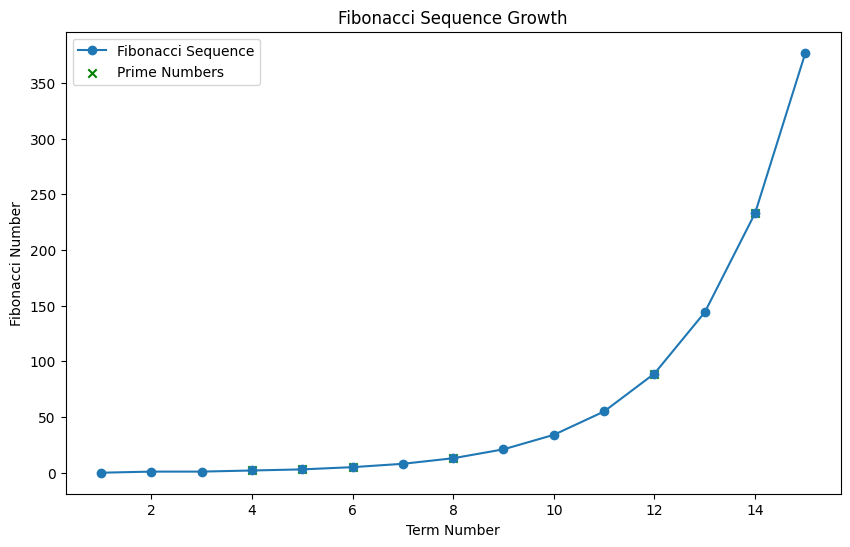

In [14]:
import matplotlib.pyplot as plt

def plot_fibonacci_growth(sequence):
    n_terms = len(sequence)
    x_values = list(range(1, n_terms + 1))

    # Plot the Fibonacci sequence
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, sequence, label='Fibonacci Sequence', marker='o')

    # Mark prime numbers in the sequence
    primes = find_primes_in_sequence(sequence)
    plt.scatter([x_values[i - 1] for i in range(1, n_terms + 1) if sequence[i - 1] in primes],
                primes, color='green', label='Prime Numbers', marker='x')

    # Add labels and title
    plt.xlabel('Term Number')
    plt.ylabel('Fibonacci Number')
    plt.title('Fibonacci Sequence Growth')
    plt.legend()

    # Show the plot
    plt.show()

# Example Usage:
example_terms = 15

# Generate the Fibonacci sequence
example_sequence = fibonacci_generator(terms=example_terms)

# Plot the growth of Fibonacci numbers and the convergence to the golden ratio
plot_fibonacci_growth(example_sequence)


## 5. Even and Odd Analysis

Here we analyze the distribution of even and odd Fibonacci number and explore patterns and relationships between even and odd terms.

We have two functions:
- `analyze_even_odd_distribution`: This analyzes the distribution of even and odd Fibonacci numbers
  - Parameters:
    - sequence: The Fibonacci sequence to analyze.

  - Returns:
    - dict: A dictionary containing the counts of even and odd terms.
- `plot_even_odd_distribution()`: Plots the distribution.
  - Parameters:
    - distribution: A dictionary containing the counts of even and odd terms.

Fibonacci sequence: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
Even and odd distribution: {'even': 5, 'odd': 10}


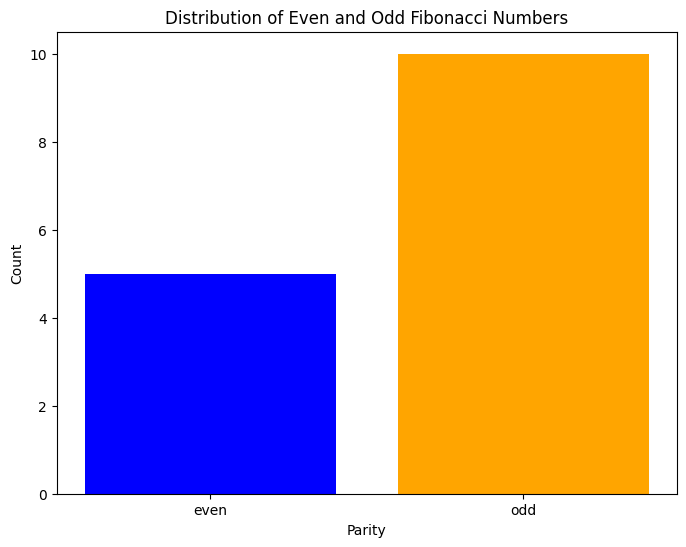

In [15]:
import matplotlib.pyplot as plt

def analyze_even_odd_distribution(sequence):
    distribution = {'even': 0, 'odd': 0}

    for term in sequence:
        if term % 2 == 0:
            distribution['even'] += 1
        else:
            distribution['odd'] += 1

    return distribution


def plot_even_odd_distribution(distribution):
    labels = list(distribution.keys())
    counts = list(distribution.values())

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=['blue', 'orange'])
    plt.xlabel('Parity')
    plt.ylabel('Count')
    plt.title('Distribution of Even and Odd Fibonacci Numbers')
    plt.show()


# Example Usage:
example_terms = 15

# Generate the Fibonacci sequence
example_sequence = fibonacci_generator(terms=example_terms)

# Analyze even and odd distribution in the Fibonacci sequence
distribution_example = analyze_even_odd_distribution(example_sequence)

# Display the results
print(f"Fibonacci sequence: {example_sequence}")
print(f"Even and odd distribution: {distribution_example}")

# Plot the distribution of even and odd Fibonacci numbers
plot_even_odd_distribution(distribution_example)

## 6. Efficiency Improvements
- Optimizing the generation algorithm of Fibonacci sequences can be achieved through memoization.

- This involves caching previously computed results to avoid redundant calculations.

- Below we have a version of the code that incorporates memoization for more efficient generation.

- The `memoized_fibonacci` function calculates Fibonacci numbers efficiently by checking if the result is already in the dictionary before performing the computation. This approach significantly improves the performance for larger sequences.

- We will still make use of the functions created above.

Fibonacci sequence: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049]
Even and odd distribution: {'even': 17, 'odd': 33}


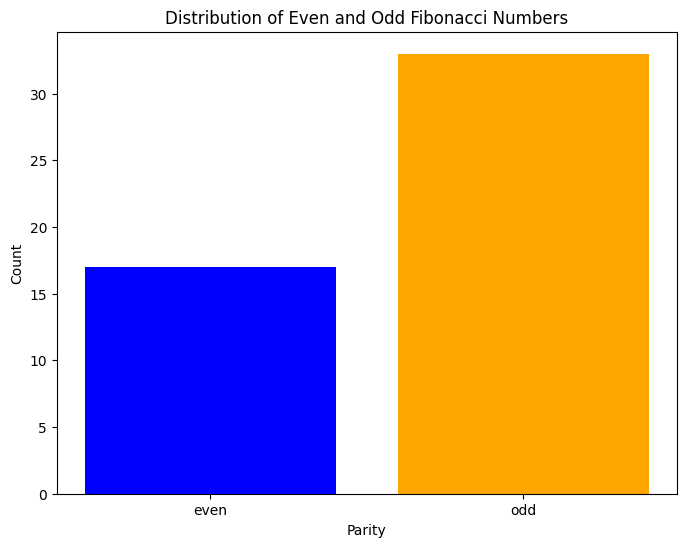

In [16]:
import matplotlib.pyplot as plt

# Memoization dictionary to store previously computed Fibonacci numbers
memo_dict = {0: 0, 1: 1}

def memoized_fibonacci(n):
    if n not in memo_dict:
        memo_dict[n] = memoized_fibonacci(n - 1) + memoized_fibonacci(n - 2)
    return memo_dict[n]

# Example Usage:
example_terms = 50  # Increase the number of terms for larger sequences

# Generate the Fibonacci sequence efficiently using memoization
example_sequence = fibonacci_generator(terms=example_terms)

# Analyze even and odd distribution in the Fibonacci sequence
distribution_example = analyze_even_odd_distribution(example_sequence)

# Display the results
print(f"Fibonacci sequence: {example_sequence}")
print(f"Even and odd distribution: {distribution_example}")

# Plot the distribution of even and odd Fibonacci numbers
plot_even_odd_distribution(distribution_example)

## 7.Limit Exploration

To explore the limiting behavior of ratios or other properties as we generate more terms in the Fibonacci sequence, you can modify the code to track and analyze these properties over increasing term counts.

Here is an version of the code that includes this feature. We have two functions:
- `calculate_ratios()`: Calculate the ratios of consecutive Fibonacci numbers.
  - Parameters:
    - sequence: The Fibonacci sequence.
  - Returns:
    - list: The list of ratios.
- `plot_ratios()`: Plot the ratios of consecutive Fibonacci numbers.
  - Parameters:
    - ratios: The list of ratios.

Fibonacci sequence: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
Ratios of consecutive Fibonacci numbers: [1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182, 1.6179775280898876, 1.6180555555555556, 1.6180257510729614, 1.6180371352785146, 1.618032786885246, 1.618034447821682, 1.6180338134001253, 1.618034055727554]


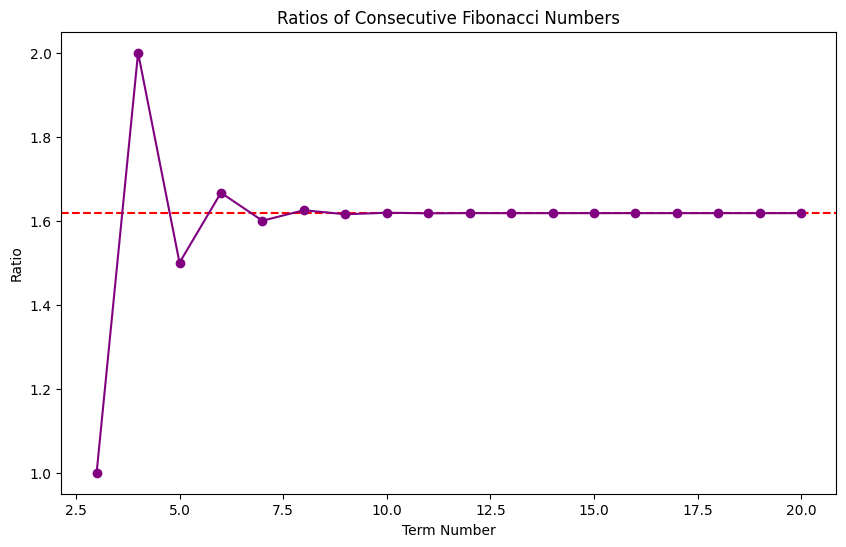

In [17]:
import matplotlib.pyplot as plt

def calculate_ratios(sequence):
    ratios = [sequence[i] / sequence[i - 1] for i in range(2, len(sequence))]
    return ratios


def plot_ratios(ratios):
    x_values = list(range(3, len(ratios) + 3))

    # Calculate the golden ratio
    golden_ratio = (1 + 5 ** 0.5) / 2

    plt.figure(figsize=(10, 6))

    # Plot a horizontal line representing the golden ratio
    plt.axhline(y=golden_ratio, color='r', linestyle='--', label='Golden Ratio')

    plt.plot(x_values, ratios, marker='o', linestyle='-', color='purple')
    plt.xlabel('Term Number')
    plt.ylabel('Ratio')
    plt.title('Ratios of Consecutive Fibonacci Numbers')
    plt.show()


# Example Usage:
example_terms = 20

# Generate the Fibonacci sequence efficiently using memoization
example_sequence = fibonacci_generator(terms=example_terms)

# Calculate the ratios of consecutive Fibonacci numbers
example_ratios = calculate_ratios(example_sequence)

# Display the results
print(f"Fibonacci sequence: {example_sequence}")
print(f"Ratios of consecutive Fibonacci numbers: {example_ratios}")

# Plot the ratios of consecutive Fibonacci numbers
plot_ratios(example_ratios)